In [106]:
import underworld as uw
import matplotlib as mpl
from matplotlib.figure import Figure
import matplotlib.pyplot as pyplot
import numpy as np
import math
import h5py
import glob
import UWGeodynamics as GEO
#from MechanicalProperties import PlateProperties
from pathlib import Path
import sys
import underworld.function as fn
#import glucifer
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText
u = GEO.UnitRegistry

In [107]:
!pwd

/home/jovyan/user_data/Paper_1_notebooks_Figures


In [108]:
def getColoursfromMap(cmapKey,NumColours):
    cmap = plt.get_cmap(cmapKey)
    norm = mcolors.Normalize(vmin=0, vmax=NumColours)
    #Base array to calculate the colors
    seedColors=np.arange(0,NumColours,1)
    colours=cmap(norm(seedColors))
    return colours

def genStdColorArray(Thicknesses,colors,colorflip):
    iColor=0
    limitThick=colorflip[1]
    plotCounter=0
    #Get Colors and put them into an array
    ColorsS=[]
    colorC=0
    for j in colors:
        ColorsS.append(getColoursfromMap(colors[colorC],len(Thicknesses)))
        colorC=colorC+1
    counter=0
    #array which will contain colors to return    
    FinalColours=[]
    
    for i in Thicknesses:
        #Color changes
        if colorflip[0]==True:
            if limitThick> i:
                Colors=ColorsS[0]
            elif limitThick<=i:
                Colors=ColorsS[1]    
            else:
                Colors=ColorsS[0]     
        color=Colors[counter]
        FinalColours.append(color)
        counter=counter+1
    return FinalColours

def FgUntilDepth(deltaStress,depth,cutOffDepth):
    counter=0
    fdeltaStress=np.array([])
    fdepth=np.array([])
    for i in depth:
        if i>cutOffDepth:
            break
        else:
            fdeltaStress=np.append(fdeltaStress,[deltaStress[counter]])
            fdepth=np.append(fdepth,[depth[counter]])
            counter=counter+1
    Fg=np.trapz(fdeltaStress,fdepth,cutOffDepth)
    return Fg

def LoadstressYProfiles_thicknesses(DataDir,time_in_Ma,thickness,fileSeed):
    #time_in_Ma=time_in_Ma/2.
    fileName=DataDir+fileSeed+"{0}_{1}.txt".format(str(thickness),str(time_in_Ma))
    Data = np.genfromtxt(fileName, dtype=float,skip_footer=1)
    return Data


def loadGPEalongX_Thickness(DataDir,time_in_Ma,thickness,fileSeed):
    #time_in_Ma=time_in_Ma/2.
    fileName=DataDir+fileSeed+"{0}_{1}.txt".format(str(thickness),str(time_in_Ma))
    Data = np.genfromtxt(fileName, dtype=float,skip_footer=1)

    return Data


In [109]:
from matplotlib.ticker import FormatStrFormatter
def GPEvsX_deltaStressYProfileAll_thicknesses(seed1,seed2,thicknessesArc,times_in_Ma,Colors,figsize): #gravitational force in depth
    rows=len(times_in_Ma)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    #Figure structure
    Fig, axs = plt.subplots(rows,3,figsize=figsize) #(ax3,ax2,ax1) 
    
    timeCounter=0
    for time_in_Ma in times_in_Ma: #Here starts the look using different times
        ax3=axs[timeCounter][0]
        ax2=axs[timeCounter][1]
        ax1=axs[timeCounter][2]
        #GPE vs X plot
        ax3.set_ylabel("GPE (N/m)",labelpad=2,fontsize=8)
        ax3.set_xlabel("Horizontal distance (Km)",labelpad=2,fontsize=8)
        ax3.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        ax3.set_yscale('symlog')
        ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        ax3.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax3.grid(True)
        varLabel="delta Stress"
        #OP plot
        ax1.set_xlabel("delta Stress-Y OP (MPa)",fontsize=8)
        ax1.set_ylabel("Depth (Km)",fontsize=8)
        ax1.set_ylim(250,0)
        adjustY1=(250-0)/(5.)
        adjustX1=(250-0)/(5.)
        arrangeTicksY1=np.arange(0,250,adjustY1)
        arrangeTicksX1=np.arange(-150,100,adjustX1)
        ax1.xaxis.set_ticks(arrangeTicksX1)
        ax1.yaxis.set_ticks(arrangeTicksY1)
        #ax1.xaxis.set_ticks(arrangeTicksX)
        ax1.set_xlim(-150,100)
        ax1.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        ax1.axvline(x=0,ymin=800,ymax=-10,linestyle='--',color='black',linewidth=0.8)
        ax1.ticklabel_format(style='plain')
        ax1.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax1.grid(True)
        #SP plot
        ax2.set_xlabel("delta Stress-Y SP (MPa)",fontsize=8)
        ax2.set_ylabel("Depth (Km)",fontsize=8)
        ax2.set_ylim(250,0)
        adjustX2=(350-0)/(5.)
        arrangeTicksY2=np.arange(0,250,adjustY1)
        arrangeTicksX2=np.arange(-200,150,adjustX2)
        ax2.xaxis.set_ticks(arrangeTicksX2)
        ax2.yaxis.set_ticks(arrangeTicksY2)
        #ax2.xaxis.set_ticks(arrangeTicksX)
        ax2.set_xlim(-200,150)
        ax2.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        #vertical line
        ax2.axvline(x=0,ymin=800,ymax=-10,linestyle='--',color='black',linewidth=0.8)
        ax2.ticklabel_format(style='plain')
        ax2.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax2.grid(True)
        
        counter=0
        for i in thicknessesArc:
            #input data from function- need this to be stored in a .txt
            X=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressOP_")[:,0]
            deltaStressOP=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressOP_")[:,1]
            deltaStressSP=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressSP_")[:,1]
            #separate data - prepare
            fgOP=(FgUntilDepth(deltaStressOP,X,1e5))/1e12 #N/m
            fgSP=(FgUntilDepth(deltaStressSP,X,1e5))/1e12 #N/m
            #
            ax1.plot(deltaStressOP/1e6, GEO.dimensionalise(X, u.kilometer),label="Fg = {0}*1e12 N/m".format(str(round(fgOP,2))),
                 color=Colors[counter],linewidth=0.8)
            #ax1.legend(fontsize=int(9),fancybox=True)
            #
            ax2.plot(deltaStressSP/1e6, GEO.dimensionalise(X, u.kilometer),label="Fg = {0}*1e12 N/m".format(str(round(fgSP,2))),
                 color=Colors[counter],linewidth=0.8)
           # ax2.legend(fontsize=int(9),fancybox=True)
        
             #GPE vs X plot from .txt
            Data=loadGPEalongX_Thickness('/home/jovyan/user_data/GPE_data/',time_in_Ma,i,"GPE_")
            X=Data[:,0]
            GPE=Data[:,1]
            ax3.plot(X,GPE/1e16,label='{0} Km'.format((eval(str(i)))),linewidth=0.6,color=Colors[counter])
            #ax.set_xlim(0,50)
            #ax3.legend(fontsize=int(9),fancybox=True)
            counter=counter+1
        
        Min=(1*10**16.022)
        Max=(1*10**16.033)
        ax3.set_ylim((1*10**16.022)/1e16,(1*10**16.032)/1e16)
        adjustY=(Max-Min)/(5.)
        adjustX=(1800+1800)/4.
    #Arrange ticks Array
        arrangeTicksY=np.arange(Min,Max,adjustY)
        arrangeTicksX=np.arange(-1800,1801,adjustX)
        #arrangeTicks=np.around(arrangeTicks,1)
        #Ticks Change
        ax3.yaxis.set_ticks(np.round(arrangeTicksY[:]/1e16,3))
        ax3.xaxis.set_ticks(arrangeTicksX)
        
        timeCounter=timeCounter+1
    Fig.tight_layout(pad=0.5,h_pad=0.08,w_pad=1)
    pyplot.subplots_adjust(wspace=0.4, hspace=0.6)
    %matplotlib
    return Fig

In [133]:
Data=loadGPEalongX_Thickness('/home/jovyan/user_data/GPE_data/',0,32,"GPE_")
Data

array([[ -1.80000000e+03,   1.06764452e+16],
       [ -1.78779661e+03,   1.06764461e+16],
       [ -1.77559322e+03,   1.06764460e+16],
       [ -1.76338983e+03,   1.06764456e+16],
       [ -1.75118644e+03,   1.06764457e+16],
       [ -1.73898305e+03,   1.06764463e+16],
       [ -1.72677966e+03,   1.06764454e+16],
       [ -1.71457627e+03,   1.06766253e+16],
       [ -1.70237288e+03,   1.06844491e+16],
       [ -1.69016949e+03,   1.07003442e+16],
       [ -1.67796610e+03,   1.07009588e+16],
       [ -1.66576271e+03,   1.07009585e+16],
       [ -1.65355932e+03,   1.07009558e+16],
       [ -1.64135593e+03,   1.07009549e+16],
       [ -1.62915254e+03,   1.07009609e+16],
       [ -1.61694915e+03,   1.07009551e+16],
       [ -1.60474576e+03,   1.07009579e+16],
       [ -1.59254237e+03,   1.07009583e+16],
       [ -1.58033898e+03,   1.07009563e+16],
       [ -1.56813559e+03,   1.07009576e+16],
       [ -1.55593220e+03,   1.07009556e+16],
       [ -1.54372881e+03,   1.07009580e+16],
       [ -

In [113]:
#Model parameters and directories
dimensions = ([-1800.,-800.],[1800.,0.])
outres = (1500,300) #Output image resolution
xRes,yRes = 296,160 #Grid/mesh resolution
seed1="outputs_MechanicalTransference_BenchmarkFinal_"
seed2="kmArc_80Ma_DruckerPrager_WLM"
#gravity=9.81*u.meter/u.second**2
#Uniform Color scale for all plots of GPE - deltaStress
ColorsPlots=genStdColorArray([20,25,32,35],["Blues_r","Reds"],[True, 32.])
#15,20,23,25,30,32,33,35

In [114]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

Using matplotlib backend: agg


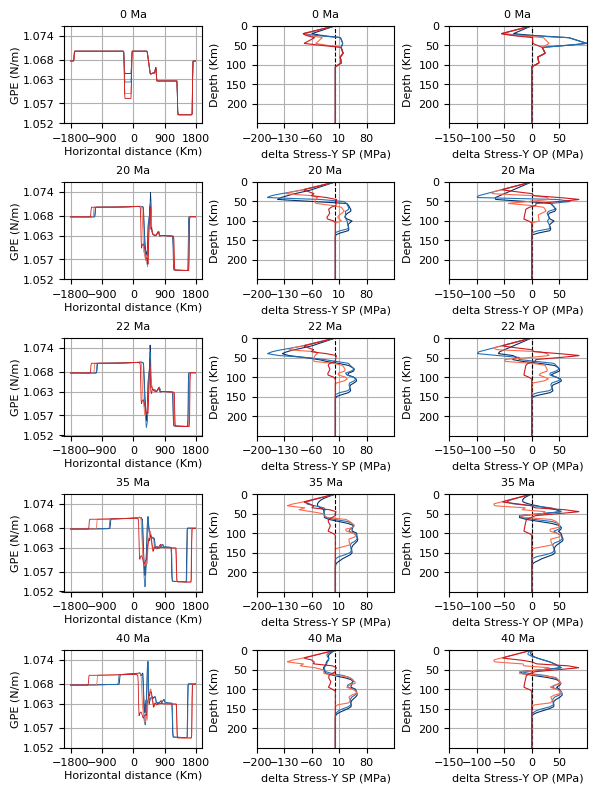

In [115]:
fig=GPEvsX_deltaStressYProfileAll_thicknesses(seed1,seed2,[20,25,32,35],[0,20,22,35,40],
                                          ColorsPlots,(15/2.54,20/2.54))
fig

In [101]:
fig.savefig('/home/jovyan/user_data/Figs_PDF_Final/Fig8_raw.pdf')

In [130]:
from matplotlib.ticker import FormatStrFormatter
def GPEvsX_deltaStressYProfileAll_thicknesses2(seed1,seed2,thicknessesArc,times_in_Ma,Colors,figsize): #gravitational force in depth
    cols=len(times_in_Ma)
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    #Figure structure
    Fig, axs = plt.subplots(3,cols,figsize=figsize) #(ax3,ax2,ax1) 
    
    timeCounter=0
    for time_in_Ma in times_in_Ma: #Here starts the look using different times
        ax3=axs[0][timeCounter]
        ax2=axs[1][timeCounter]
        ax1=axs[2][timeCounter]
        #GPE vs X plot
        ax3.set_ylabel("GPE (N/m)",labelpad=2,fontsize=8)
        ax3.set_xlabel("Horizontal distance (Km)",labelpad=2,fontsize=8)
        ax3.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        ax3.set_yscale('symlog')
        ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        ax3.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax3.grid(True)
        varLabel="delta Stress"
        #OP plot
        ax1.set_xlabel("delta Stress-Y OP (MPa)",fontsize=8)
        ax1.set_ylabel("Depth (Km)",fontsize=8)
        ax1.set_ylim(250,0)
        adjustY1=(250-0)/(5.)
        adjustX1=(350-0)/(5.)
        arrangeTicksY1=np.arange(0,250,adjustY1)
        arrangeTicksX1=np.arange(-200,150,adjustX1)
        ax1.xaxis.set_ticks(arrangeTicksX1)
        ax1.yaxis.set_ticks(arrangeTicksY1)
        #ax1.xaxis.set_ticks(arrangeTicksX)
        ax1.set_xlim(-200,150)
        ax1.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        ax1.axvline(x=0,ymin=800,ymax=-10,linestyle='--',color='black',linewidth=0.8)
        ax1.ticklabel_format(style='plain')
        ax1.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax1.grid(True)
        #SP plot
        ax2.set_xlabel("delta Stress-Y SP (MPa)",fontsize=8)
        ax2.set_ylabel("Depth (Km)",fontsize=8)
        ax2.set_ylim(250,0)
        adjustX2=(350-0)/(5.)
        arrangeTicksY2=np.arange(0,250,adjustY1)
        arrangeTicksX2=np.arange(-200,150,adjustX2)
        ax2.xaxis.set_ticks(arrangeTicksX2)
        ax2.yaxis.set_ticks(arrangeTicksY2)
        #ax2.xaxis.set_ticks(arrangeTicksX)
        ax2.set_xlim(-200,150)
        ax2.set_title("{0} Ma".format(str(time_in_Ma)),size=8, loc="center")
        #vertical line
        ax2.axvline(x=0,ymin=800,ymax=-10,linestyle='--',color='black',linewidth=0.8)
        ax2.ticklabel_format(style='plain')
        ax2.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax2.grid(True)
        
        counter=0
        for i in thicknessesArc:
            #input data from function- need this to be stored in a .txt
            X=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressOP_")[:,0]
            deltaStressOP=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressOP_")[:,1]
            deltaStressSP=LoadstressYProfiles_thicknesses('/home/jovyan/user_data/stressYprofiles_data/',time_in_Ma,i,"stressSP_")[:,1]
            #separate data - prepare
            fgOP=(FgUntilDepth(deltaStressOP,X,1e5))/1e12 #N/m
            fgSP=(FgUntilDepth(deltaStressSP,X,1e5))/1e12 #N/m
            #
            ax1.plot(deltaStressOP/1e6, GEO.dimensionalise(X, u.kilometer),label="Fg = {0}*1e12 N/m".format(str(round(fgOP,2))),
                 color=Colors[counter],linewidth=0.8)
            #ax1.legend(fontsize=int(9),fancybox=True)
            #
            ax2.plot(deltaStressSP/1e6, GEO.dimensionalise(X, u.kilometer),label="Fg = {0}*1e12 N/m".format(str(round(fgSP,2))),
                 color=Colors[counter],linewidth=0.8)
           # ax2.legend(fontsize=int(9),fancybox=True)
        
             #GPE vs X plot from .txt
            Data=loadGPEalongX_Thickness('/home/jovyan/user_data/GPE_data/',time_in_Ma,i,"GPE_")
            X=Data[:,0]
            GPE=Data[:,1]
            ax3.plot(X,GPE/1e16,label='{0} Km'.format((eval(str(i)))),linewidth=0.6,color=Colors[counter])
            #ax.set_xlim(0,50)
            ax3.legend(fontsize=int(9),fancybox=True)
            counter=counter+1
        
        Min=(1*10**16.022)
        Max=(1*10**16.033)
        ax3.set_ylim((1*10**16.022)/1e16,(1*10**16.032)/1e16)
        adjustY=(Max-Min)/(5.)
        adjustX=(1800+1800)/4.
    #Arrange ticks Array
        arrangeTicksY=np.arange(Min,Max,adjustY)
        arrangeTicksX=np.arange(-1800,1801,adjustX)
        #arrangeTicks=np.around(arrangeTicks,1)
        #Ticks Change
        ax3.yaxis.set_ticks(np.round(arrangeTicksY[:]/1e16,3))
        ax3.xaxis.set_ticks(arrangeTicksX)
        
        timeCounter=timeCounter+1
    Fig.tight_layout(pad=0.5,h_pad=0.08,w_pad=1)
    pyplot.subplots_adjust(wspace=0.4, hspace=0.6)
    %matplotlib
    return Fig

Using matplotlib backend: agg


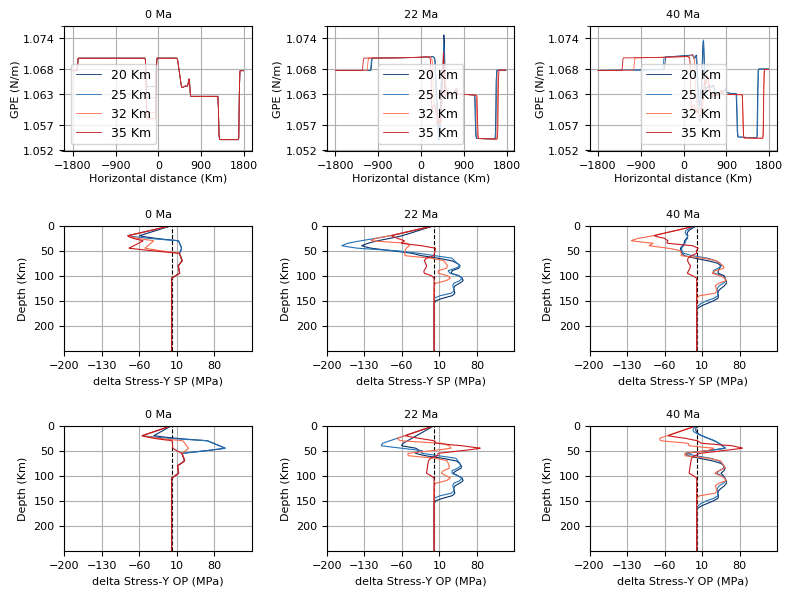

In [131]:
fig=GPEvsX_deltaStressYProfileAll_thicknesses2(seed1,seed2,[20,25,32,35],[0,22,40],
                                          ColorsPlots,(20/2.54,15/2.54))
fig